In [1]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
%run functions.ipynb #pulling in functions from other file 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras import Input, layers
from tensorflow.keras import models
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op
print(tf.__version__)
import numpy as np
import shutil, os
import matplotlib.pyplot as plt
import pathlib
import random
import sys
import io
import os
import glob
from datetime import datetime as dt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import os
from absl import app

assert tf.__version__.startswith('2')

2.8.0


In [4]:
IMAGE_SIZE=IMG_SIZE = 96
BATCH_SIZE = 128


batch_size = 128
validation_split = 0.1

lrates = .001, .0005, .00025

color_mode = 'grayscale'
if color_mode == 'grayscale':
  n_color_chans = 1
elif color_mode == 'rgb':
  n_color_chans = 3
else:
  raise ValueError("color_mode should be either 'rgb' or 'grayscale'")

BASE_DIR ="/Users/Jeromey/IOT/project2/data/augmented"


In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=.1,
    horizontal_flip=True,
    validation_split=validation_split,
    rescale=1. / 255)
train_generator = datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    color_mode='grayscale') # was 'rgb'
val_generator = datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    color_mode='grayscale') # was 'rgb'
print(train_generator.class_indices)


def train_epochs(model, train_generator, val_generator, epoch_count,
                 learning_rate, steps_per_epoch=None):
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
  if steps_per_epoch is None:
    steps_per_epoch = len(train_generator)
  history_fine = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=epoch_count,
      validation_data=val_generator,
      validation_steps=len(val_generator),
      batch_size=BATCH_SIZE)
  return model
)

Found 908428 images belonging to 2 classes.
Found 100935 images belonging to 2 classes.
{'notperson': 0, 'person': 1}


In [10]:
model_file = 'kws_ufe_05may2022_1846.h5'
model = tf.keras.models.load_model(model_file)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 8)         80        
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 8)        32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 8)         0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 48, 48, 8)        80        
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 8)        32    

                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 128)         16512     
                                                                 
 batch_normalization_16 (Bat  (None, 6, 6, 128)        512       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 6, 6, 128)         0         
                                                                 
 depthwise_conv2d_8 (Depthwi  (None, 6, 6, 128)        1280      
 seConv2D)                                                       
                                                                 
 batch_normalization_17 (Bat  (None, 6, 6, 128)        512       
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 6, 6, 128)         0         
          

In [12]:
test_model(1000) #For unknown its inverted so % wrong

Bird accuracy: 0.989
Unknown accuracy: 0.01


Epoch 1/100
2366/2366 [==============================] - 1085s 458ms/step - loss: 0.1096 - accuracy: 0.9682 - val_loss: 0.5835 - val_accuracy: 0.8523
Epoch 2/100
2366/2366 [==============================] - 1196s 506ms/step - loss: 0.1034 - accuracy: 0.9702 - val_loss: 0.5750 - val_accuracy: 0.8529
Epoch 3/100
2366/2366 [==============================] - 1233s 521ms/step - loss: 0.1017 - accuracy: 0.9703 - val_loss: 0.4825 - val_accuracy: 0.8636
Epoch 4/100
2366/2366 [==============================] - 1045s 442ms/step - loss: 0.1007 - accuracy: 0.9706 - val_loss: 0.5322 - val_accuracy: 0.8523
Epoch 5/100
2366/2366 [==============================] - 914s 386ms/step - loss: 0.0980 - accuracy: 0.9712 - val_loss: 0.4038 - val_accuracy: 0.8699
Epoch 6/100
2366/2366 [==============================] - 846s 358ms/step - loss: 0.0974 - accuracy: 0.9712 - val_loss: 0.4631 - val_accuracy: 0.8609
Epoch 7/100
2366/2366 [==============================] - 788s 333ms/step - loss: 0.0960 - accuracy: 0.

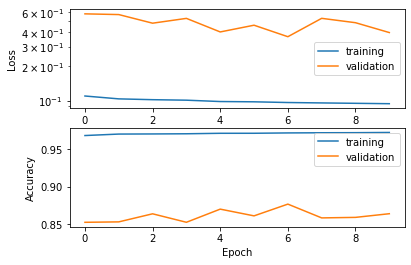

In [14]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(.00025),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
callback=tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    verbose=1,
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    validation_data=val_generator,  
    steps_per_epoch=len(train_generator)//3,
    validation_steps=len(val_generator)//2,
    epochs=100,
    callbacks=[callback]
)

plot_accuracy(history)

Epoch 1/100
2366/2366 [==============================] - 1195s 504ms/step - loss: 0.0929 - accuracy: 0.9729 - val_loss: 0.4424 - val_accuracy: 0.8669
Epoch 2/100
2366/2366 [==============================] - 1020s 431ms/step - loss: 0.0905 - accuracy: 0.9739 - val_loss: 0.4339 - val_accuracy: 0.8677
Epoch 3/100
2366/2366 [==============================] - 937s 396ms/step - loss: 0.0908 - accuracy: 0.9736 - val_loss: 0.4345 - val_accuracy: 0.8679
Epoch 4/100
2366/2366 [==============================] - 861s 364ms/step - loss: 0.0898 - accuracy: 0.9740 - val_loss: 0.4398 - val_accuracy: 0.8666
Epoch 5/100
2366/2366 [==============================] - 789s 333ms/step - loss: 0.0893 - accuracy: 0.9739 - val_loss: 0.4405 - val_accuracy: 0.8669
Epoch 6/100
2366/2366 [==============================] - 722s 305ms/step - loss: 0.0899 - accuracy: 0.9738 - val_loss: 0.4429 - val_accuracy: 0.8669
Epoch 6: early stopping


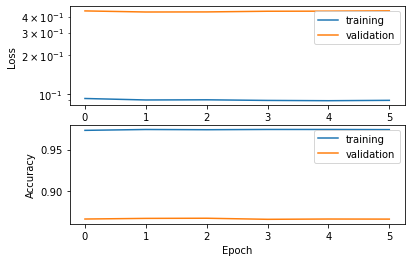

In [17]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(0.00001),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
callback=tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    verbose=1,
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    validation_data=val_generator,  
    steps_per_epoch=len(train_generator)//3,
    validation_steps=len(val_generator)//2,
    epochs=100,
    callbacks=[callback]
)

plot_accuracy(history)

In [18]:
save_model()

Saving model to kws_ufe_06may2022_0038.h5


Epoch 1/100
7098/7098 [==============================] - 2282s 321ms/step - loss: 0.0896 - accuracy: 0.9741 - val_loss: 0.4369 - val_accuracy: 0.8683
Epoch 2/100
7098/7098 [==============================] - 1988s 280ms/step - loss: 0.0891 - accuracy: 0.9741 - val_loss: 0.4484 - val_accuracy: 0.8673
Epoch 3/100
7098/7098 [==============================] - 2091s 295ms/step - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.4392 - val_accuracy: 0.8677
Epoch 4/100
7098/7098 [==============================] - 2643s 372ms/step - loss: 0.0881 - accuracy: 0.9746 - val_loss: 0.4521 - val_accuracy: 0.8665
Epoch 4: early stopping


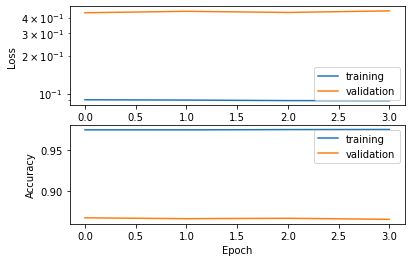

In [19]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(0.00001),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
callback=tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    verbose=1,
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    validation_data=val_generator,  
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    epochs=100,
    callbacks=[callback]
)

plot_accuracy(history)

In [20]:
save_model()

Saving model to kws_ufe_06may2022_0308.h5


Epoch 1/100
7098/7098 [==============================] - 3271s 460ms/step - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.4431 - val_accuracy: 0.8669
Epoch 2/100
7098/7098 [==============================] - 2109s 297ms/step - loss: 0.0889 - accuracy: 0.9743 - val_loss: 0.4470 - val_accuracy: 0.8665
Epoch 3/100
7098/7098 [==============================] - 2137s 301ms/step - loss: 0.0891 - accuracy: 0.9742 - val_loss: 0.4448 - val_accuracy: 0.8669
Epoch 4/100
7098/7098 [==============================] - 2081s 293ms/step - loss: 0.0888 - accuracy: 0.9743 - val_loss: 0.4490 - val_accuracy: 0.8670
Epoch 5/100
7098/7098 [==============================] - 2142s 302ms/step - loss: 0.0885 - accuracy: 0.9744 - val_loss: 0.4458 - val_accuracy: 0.8670
Epoch 6/100
7098/7098 [==============================] - 2065s 291ms/step - loss: 0.0887 - accuracy: 0.9743 - val_loss: 0.4463 - val_accuracy: 0.8670
Epoch 7/100
7098/7098 [==============================] - 2107s 297ms/step - loss: 0.0884 - accuracy:

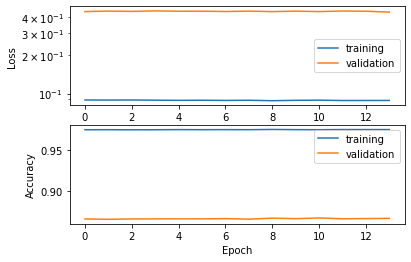

In [21]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(0.000001),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
callback=tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    verbose=1,
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    validation_data=val_generator,  
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    epochs=100,
    callbacks=[callback]
)

plot_accuracy(history)

In [22]:
save_model()

Saving model to kws_ufe_06may2022_1225.h5
